### Import libraries

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
import sklearn as sk

## Step 1 : Import and cleaning
_______________________________________________________

#### 1.1 Import data (1/4)

In [299]:
data = pd.read_csv('../ML1/arbres_grenoble_epsg4326.csv')

In [300]:
data.head(5)

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,5259,ESP11324,AR11324,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175673908288694,5.749421158918044"
1,1478,ESP27796,AR27796,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175689031385716,5.749449836814956"
2,13139,ESP4323,AR4323,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,"45.175403375194556,5.748482643586666"
3,24132,ESP7132,AR7132,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,"45.17542427590123,5.748557574259692"
4,23970,ESP15162,AR15162,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,NaN,Ville de Grenoble,NaN,NaN,"45.17760812265083,5.749356960358159"


In [301]:
data.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'equipe',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'courrier', 'identifiantplu',
       'typeimplantationplu', 'intituleprotectionplu', 'anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage', 'collectivite',
       'stationmetro', 'hauteurarbre', 'portarbre', 'structure', 'forme',
       'typenature', 'geo_point_2d'],
      dtype='object')

In [302]:
#garder la variable initiale 'data' sans aucun changement
arbres_gre = data

#### 1.2 and 1.3. Delete rows with missing values in «année de plantation» and analyss of data structure (3/4)

In [303]:
arbres_gre.describe()

,elem_point_id,adr_secteur,equipe,anneedeplantation,courrier,identifiantplu,anneeabattage,essouchement,diametrearbre,causeabattage
count,31736.000000,31736.000000,0.0,30144.000000,0.0,600.000000,0.0,0.0,0.0,0.0
mean,20393.645544,3.826758,NaN,1990.018644,NaN,87.856667,NaN,NaN,NaN,NaN
std,12759.662993,1.718467,NaN,17.992314,NaN,60.657935,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9656.750000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,19424.500000,4.000000,NaN,1987.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,29254.250000,5.000000,NaN,2006.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,46807.000000,6.000000,NaN,2022.000000,NaN,358.000000,NaN,NaN,NaN,NaN


In [304]:
# identifying the existence of nan values or non numeric (.info())
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970.,   nan, 1995., 2022., 1993., 1988., 1980.,
       2005., 2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955.,
       1981., 1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012.,
       1992., 1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002.,
       1987., 1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985.,
       1966., 1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016.,
       2018., 2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021.,
       2014., 1900., 1959., 1964.])

In [305]:
# Dropping nan values on the annedeplantation column
# dropping unnecessary columns (checked down when using describe)
arbres_gre = (arbres_gre.dropna(subset='anneedeplantation')
                        .drop(['code','elem_point_id','nom',
                 'genre','genre_desc', 'equipe', 'categorie',
                 'categorie_desc', 'traitementchenilles', 'sous_categorie', 'code_parent',
                 'remarques', 'identifiantplu','intituleprotectionplu',
                 'stationmetro', 'courrier', 'typeimplantationplu', 'bien_reference',
                 'anneeabattage', 'typeimplantationplu', 'sous_categorie_desc', 'code_parent_desc',
                 'essouchement', 'diametrearbre', 'causeabattage', 'forme'], axis=1)
)

In [359]:
arbres_gre.adr_secteur.
Bonjour Carlosse

adr_secteur
6    6716
5    6547
2    5974
3    4095
4    3779
1    3033
Name: count, dtype: int64

In [307]:
#checking if nans were dropped
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970., 1995., 2022., 1993., 1988., 1980., 2005.,
       2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955., 1981.,
       1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012., 1992.,
       1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002., 1987.,
       1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985., 1966.,
       1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016., 2018.,
       2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021., 2014.,
       1900., 1959., 1964.])

In [358]:
arbres_gre

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [308]:
#checking number of years
arbres_gre['anneedeplantation'].value_counts()

anneedeplantation
1975.0    3481
2001.0    1473
1980.0    1397
1970.0    1340
2015.0     998
          ... 
1944.0      26
1959.0      16
1924.0      11
1964.0       6
2021.0       4
Name: count, Length: 66, dtype: int64

In [309]:
arbres_gre[['longitude', 'latitude']] = arbres_gre['geo_point_2d'].str.split(",", expand = True)
arbres_gre[['longitude', 'latitude']] = arbres_gre[['longitude', 'latitude']].apply(pd.to_numeric)

In [310]:
arbres_gre = arbres_gre.drop(['geo_point_2d'], axis = 1)

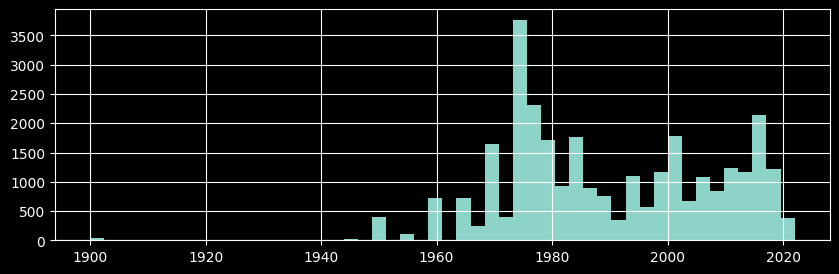

In [311]:
arbres_gre.anneedeplantation.hist(bins=50, figsize=(10,3))
plt.show()

In [352]:
#Version 1 

arbres_gre_2 = arbres_gre.copy()
list_col = ['genre_bota', 'espece', 'variete']genre_bota', 'espece', 'variete'

for col in list_col:

    compte = arbres_gre_2[col].value_counts()
    n = 5
    list_cat_unique = []
    for cat in compte.index:
        if compte[cat] <= n:
            list_cat_unique.append(cat)
    # apply applique la fonction a chaque element de ma serie 

    arbres_gre_2[col] = arbres_gre_2[col].apply(lambda x: "other" if x in list_cat_unique else x)
arbres_gre_2

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [313]:
arbres_gre

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [353]:
# Version 2 (update)
arbres_gre_2 = arbres_gre.copy()
list_col = ['genre_bota', 'espece', 'variete']

for col in list_col:

    compte = arbres_gre_2[col].value_counts()
    n = 5
    list_cat_unique = [cat for cat in compte.index if compte[cat] <= n]

    # apply applique la fonction a chaque element de ma serie 

    arbres_gre_2[col] = arbres_gre_2[col].apply(lambda x: "other" if x in list_cat_unique else x)
arbres_gre_2

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [349]:
len(arbres_gre_2.espece.value_counts()), len(arbres_gre.espece.value_counts()), 

(190, 274)

In [350]:
len(arbres_gre_2.genre_bota.value_counts()), len(arbres_gre.genre_bota.value_counts()), 

(89, 115)

#### 1.4. Saving as pickle (4/4)

In [317]:
arbres_pk = arbres_gre_2.to_pickle("../ML1/arbres-grenoble.pkl")

## Step 2 : Preparing data and evaluating ML models
_________________________________________

In [318]:
arbres_pk = pd.read_pickle('../ML1/arbres-grenoble.pkl')
arbres_pk

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [319]:
arbres_pk.columns

Index(['adr_secteur', 'genre_bota', 'espece', 'variete',
       'stadededeveloppement', 'anneedeplantation', 'raisondeplantation',
       'collectivite', 'hauteurarbre', 'portarbre', 'structure', 'typenature',
       'longitude', 'latitude'],
      dtype='object')

##### 2.1 Visualisez l'ensemble de données d'arbres pour comprendre ce qu'il contient

In [320]:
arbres_pk.head(5)

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357


In [321]:
arbres_pk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30144 entries, 0 to 31735
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adr_secteur           30144 non-null  int64  
 1   genre_bota            30118 non-null  object 
 2   espece                28753 non-null  object 
 3   variete               4578 non-null   object 
 4   stadededeveloppement  27860 non-null  object 
 5   anneedeplantation     30144 non-null  float64
 6   raisondeplantation    3287 non-null   object 
 7   collectivite          29948 non-null  object 
 8   hauteurarbre          19995 non-null  object 
 9   portarbre             13931 non-null  object 
 10  structure             29924 non-null  object 
 11  typenature            13931 non-null  object 
 12  longitude             30144 non-null  float64
 13  latitude              30144 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 3.4+ MB


In [322]:
arbres_pk.describe()

,adr_secteur,anneedeplantation,longitude,latitude
count,30144.000000,30144.000000,30144.000000,30144.000000
mean,3.828722,1990.018644,45.177280,5.727445
std,1.706830,17.992314,0.011999,0.012782
min,1.000000,1900.000000,45.151572,5.697915
25%,2.000000,1975.000000,45.166299,5.717668
50%,4.000000,1987.000000,45.175925,5.729491
75%,5.000000,2006.000000,45.187461,5.737417
max,6.000000,2022.000000,45.224825,5.798704


##### 2.2. Créer un modèle naïf à utiliser comme référence pour les performances

In [323]:
#Using a funciton that splits training and test (80/20 ratio)
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [324]:
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

In [325]:
#Applying the ration 80/20 to split our data
#train_set, test_set = split_train_test (arbres_pk, 0.2)
#print(len(train_set))
#print(len(test_set))


In [326]:
# arbres_pk_id = arbres_pk.reset_index()
# train_set, test_set = split_train_test_by_id(arbres_pk_id, 0.2, "index")
# print(len(train_set))
# print(len(test_set))

In [327]:
from sklearn.model_selection import train_test_split

X = arbres_pk.drop(['anneedeplantation'], axis=1)
y = arbres_pk['anneedeplantation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
y_pred_naiv = np.zeros_like(y_test) + y_train.median()
y_pred_naiv

array([1987., 1987., 1987., ..., 1987., 1987., 1987.])

In [329]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

msg = f"MODEL NAIF -- MEDIAN\nMSE = {mean_squared_error(y_test, y_pred_naiv):.1f}\nRMSE = {(mean_squared_error(y_test, y_pred_naiv))**0.5:.1f}\nMAE = {mean_absolute_error(y_test, y_pred_naiv):.1f}"
print(msg)


MODEL NAIF -- MEDIAN
MSE = 332.0
RMSE = 18.2
MAE = 15.5


In [330]:
# print(len(train_set))
# print(len(test_set))

##### 2.3. Pipeline scikit-learn pour le prétraitement des données 

In [342]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Stratify sur les features: StratifiedShuffleSplit

# train_set, test_set = train_test_split(arbres_pkl, test_size=0.2, random_state=42)
#>> Sort 2 outputs (dans ce dataset il y a la target dedans)

y = arbres_pk['anneedeplantation']
X = arbres_pk.drop('anneedeplantation', axis = 1)
# Sort 4 outputs (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(len(train_set))
# print(len(test_set))

In [332]:
from sklearn.compose import make_column_selector
# numerical_features = ['adr_secteur', 'longitude', 'latitude']
numerical_features = make_column_selector(dtype_include=np.number)

# categorical_features = ['bien_reference', 'genre_bota', 'espece', 'variete',
#                         'stadededeveloppement', 'raisondeplantation',
#                         'collectivite', 'hauteurarbre', 'portarbre', 
#                         'structure', 'typenature']
categorical_features = make_column_selector(dtype_exclude=np.number)

In [333]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import SGDClassifier

In [354]:
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

In [335]:
#Pipeline : Method 1
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      (categorical_pipeline, categorical_features))

In [336]:
#Pipeline : Method 2
#full_pipeline = ColumnTransformer([("num", numerical_pipeline, numerical_features),
                                    # ("cat", categorical_pipeline, categorical_features)])

In [337]:
#Pipeline : Method 3
# cat_encoder = OneHotEncoder()
# arbres_pk_cat_1hot = cat_encoder.fit_transform(arbres_pk)
#1. arbres_pk_cat_1hot
#2. arbres_pk_cat_1hot.toarray()
#3. cat_encoder.categories_

In [338]:
#Fit toujours sur les données d'entrainement (jamais sur les données de test)

X_train_pipe = preprocessor.fit_transform(X_train)
X_train_pipe

<24115x386 sparse matrix of type '<class 'numpy.float64'>'
	with 313495 stored elements in Compressed Sparse Row format>

In [339]:
#X_test

In [340]:
#Transform toujours sur donnes de Test
#
X_test_pipe = preprocessor.transform(X_test)

In [341]:

model = make_pipeline(preprocessor, SGDClassifier(loss='log_loss'))
#model.fit(X, y)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f51871e2410>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5187fc3990>)])),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

##### 2.4 Évaluation des performances de trois modèles non réglés

##### 2.4.1 Linear Regression

In [368]:
from sklearn.linear_model import LinearRegression

In [367]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_pipe, y_train)

LinearRegression()

Text(0, 0.5, 'y_pred')

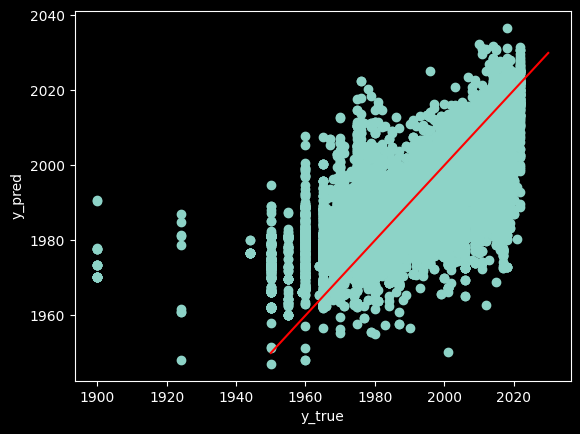

In [451]:
lin_reg.fit(X_train_pipe, y_train)
z = lin_reg.predict(X_train_pipe)
plt.scatter(y_train, z)
plt.plot([1950, 2030], [1950, 2030], 'r-')
plt.xlabel('y_true')
plt.ylabel('y_pred')


In [443]:
#example
some_data = arbres_pk.iloc[:7]
some_labels = y_train.iloc[:7]
some_data_prepared = preprocessor.transform(some_data)
some_data_pred = lin_reg.predict(some_data_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [1982.07008634 1983.33646332 1995.60287951 1991.21258909 2005.84280069
 1985.01859722 1982.62816932]
Labels: [2010.0, 1978.0, 1975.0, 1981.0, 1969.0, 2014.0, 1955.0]


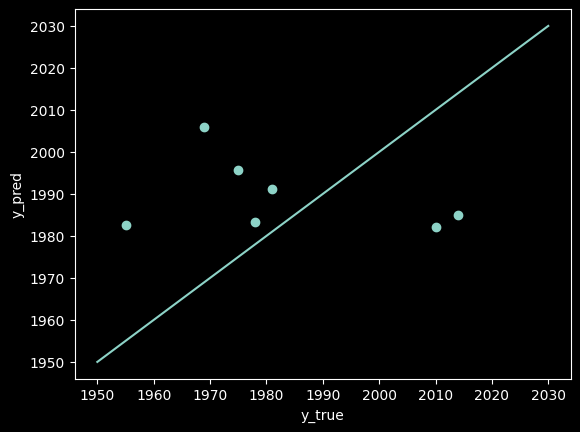

In [448]:
plt.figure()
plt.scatter(x = some_labels, y = some_data_pred)
plt.plot([1950, 2030], [1950, 2030], '-')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

In [454]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

tree_predictions = lin_reg.predict(X_test_pipe)
lin_mse = mean_squared_error(y_test, tree_predictions)
#** RMSE : squared=False // default: MSE
lin_rmse = np.sqrt(lin_mse)
lin_rmse, mean_absolute_error(y_test, tree_predictions)

(12.133278744185011, 9.151939952524808)

##### 2.4.2 DecisionTreeRegressor

In [453]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_pipe, y_train)

DecisionTreeRegressor()

In [462]:
tree_predictions = tree_reg.predict(X_test_pipe)
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
#tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.8694565457908565

In [463]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_pipe, y_train, 
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [465]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [9.13978419 8.43993999 8.24321923 8.18155309 8.27416808 8.32699607
 9.12951195 8.16297597 8.21537138 8.80165325]
Mean: 8.49151731973598
Standard deviation: 0.36638303680832934


In [468]:
lin_scores = cross_val_score(lin_reg, X_train_pipe, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [12.64570834 12.35109324 12.03028299 12.21751336 12.06499798 11.98415731
 12.54960648 11.58669682 12.51773098 12.15427221]
Mean: 12.210205971233407
Standard deviation: 0.3026181029285036


In [467]:
#svm

In [469]:
#svm2